## Machine Learning Models to Address Kickstarter Backers' and Creators' Concerns
This is a Xccelerate Full Time Data Science Bootcamp Cohort 3 group project, that we practice our skills in buildling machine learning models.

Riding on the Kaggle [dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) regarding kickstarter projects, we try to build ML models to address:
* Creators' concern about the fund amount being raised
* Backers' concern about whether a campaign be successful  

**Skills**: data understanding, visualisation, data transformation, machine learning models

### Table of Contents
* [Data Cleaning](#data_cleaning)
* [Data Visualization](#EDA)
* Regression model for Creators (Linear Regression, Random Forest Regressor)
    * [Model 1](#regression_m1): using predicting features that are only available before the campaign starts
    * [Model 2](#regression_m2): include features that are only available **AFTER** the campaign starts (explanation included)
        * Linear Regression
        * Random Forest Regressor
    * [Summary](#summary_reg) of Regression problem
* Classification model for Backers (Logistic Regression, Random Forest Classifier
    * [Model](#classification): all are based on features available prior to campaign starts
    * [Summary](#summary_c) of Classification problem
* [Improvement](#improvement)

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

<a id='data_cleaning'></a>
### Data Cleaning

In [2]:
#open the dataset with records from 3May09 - 3Mar18
with open("kickstarter-projects/ks-projects-201801.csv") as f:
    df = pd.read_csv(f)

In [3]:
#check number of records and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
#number of campaigns under each state
df["state"].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [6]:
df["state"].value_counts(normalize=True)

failed        0.522153
successful    0.353762
canceled      0.102411
undefined     0.009407
live          0.007392
suspended     0.004875
Name: state, dtype: float64

In [7]:
#check country
df["country"].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [8]:
#drop unidentified country N,0
df[df["country"]=='N,0"']

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,1585.00,undefined,0,"N,0""",NaN,1585.00,1200.00


In [9]:
df["launched"]=pd.to_datetime(df["launched"])    #convert to datetime

In [10]:
df["deadline"]=pd.to_datetime(df["deadline"])    #convert to datetime

In [11]:
df.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [12]:
# calculate the overall fund raising campaign duration
df["duration"] = (df["deadline"]-df["launched"]).astype('timedelta64[D]')+1

In [13]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,59.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,60.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,45.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,30.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,56.0


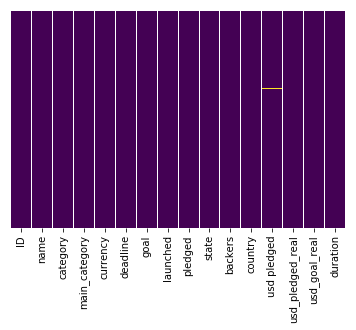

In [14]:
#see if there is any missing value which will be in yellow, and the dataset is quite clean
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap='viridis')

In [15]:
cleaned_df = df.drop(["usd pledged"], axis = 1)

In [16]:
cleaned_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,59.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,60.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,45.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,30.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00,56.0


In [17]:
#we drop the undefined and live campaigns
cleaned_df = cleaned_df[cleaned_df["state"] != 'undefined']
cleaned_df = cleaned_df[cleaned_df["state"] != 'live']

In [18]:
cleaned_df["state"].value_counts()

failed        197719
successful    133956
canceled       38779
suspended       1846
Name: state, dtype: int64

In [19]:
cleaned_df.groupby('main_category')['category'].value_counts()

main_category  category         
Art            Art                  8190
               Painting             3275
               Illustration         3134
               Public Art           3070
               Mixed Media          2738
               Performance Art      2150
               Sculpture            1806
               Digital Art          1331
               Conceptual Art       1022
               Installations         475
               Ceramics              302
               Textiles              274
               Video Art             192
Comics         Comics               4981
               Comic Books          2710
               Graphic Novels       1845
               Webcomics             644
               Anthologies           402
               Events                161
Crafts         Crafts               4631
               Woodworking          1156
               DIY                  1153
               Candles               427
               Printing 

In [20]:
cleaned_df["country"].value_counts(normalize=True)

US      0.781324
GB      0.089694
CA      0.039280
AU      0.020868
DE      0.011002
FR      0.007754
NL      0.007609
IT      0.007526
ES      0.005974
SE      0.004666
MX      0.004418
NZ      0.003857
DK      0.002947
IE      0.002149
CH      0.002006
NO      0.001880
BE      0.001625
HK      0.001566
AT      0.001563
SG      0.001416
N,0"    0.000629
LU      0.000164
JP      0.000083
Name: country, dtype: float64

In [21]:
# using LabelEncoder we convert the ['state'] column from text to digit
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(cleaned_df["state"])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
cleaned_df["state"] = le.transform(cleaned_df["state"])


{'canceled': 0, 'failed': 1, 'successful': 2, 'suspended': 3}


In [22]:
# create column 'is_successful' to indicate successful campaign as 1, else 0
cleaned_df['is_successful'] = cleaned_df['state'].apply(lambda x: 1 if x == 2 else 0)

In [23]:
cleaned_df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,duration,is_successful
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,1,0,GB,0.00,1533.95,59.0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,1,15,US,2421.00,30000.00,60.0,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,1,3,US,220.00,45000.00,45.0,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,1,1,US,1.00,5000.00,30.0,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,0,14,US,1283.00,19500.00,56.0,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,2,224,US,52375.00,50000.00,35.0,1
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,2,16,US,1205.00,1000.00,20.0,1
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,1,40,US,453.00,25000.00,45.0,0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,0,58,US,8233.00,125000.00,35.0,0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,0,43,US,6240.57,65000.00,30.0,0


In [24]:
cleaned_df.groupby("usd_goal_real")["goal"].count()

usd_goal_real
1.000000e-02      2
1.500000e-01      1
4.900000e-01      1
5.000000e-01      1
5.500000e-01      1
5.800000e-01      1
7.200000e-01      1
7.300000e-01      1
7.400000e-01      3
7.500000e-01      6
7.600000e-01      3
7.700000e-01      3
7.800000e-01      3
7.900000e-01      1
8.100000e-01      1
8.300000e-01      3
8.600000e-01      1
8.800000e-01      1
8.900000e-01      1
9.100000e-01      1
9.300000e-01      1
9.700000e-01      1
1.000000e+00    330
1.040000e+00      1
1.060000e+00      2
1.080000e+00      1
1.090000e+00      4
1.100000e+00      5
1.110000e+00      1
1.140000e+00      1
               ... 
2.853002e+07      1
2.924249e+07      1
3.000000e+07      4
3.048873e+07      1
3.300000e+07      1
3.500000e+07      2
3.902344e+07      1
4.000000e+07      5
4.433607e+07      1
4.500000e+07      1
5.000000e+07     11
5.164702e+07      1
5.500000e+07      3
5.800000e+07      1
6.000000e+07      1
7.300000e+07      1
7.500000e+07      1
7.628696e+07      1
7.9478

In [25]:
# drop the usd_goal_real which is smaller than 1000
cleaned_df[cleaned_df["usd_goal_real"] < 1000].count()

ID                  47490
name                47490
category            47490
main_category       47490
currency            47490
deadline            47490
goal                47490
launched            47490
pledged             47490
state               47490
backers             47490
country             47490
usd_pledged_real    47490
usd_goal_real       47490
duration            47490
is_successful       47490
dtype: int64

In [26]:
cleaned_df.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                        int64
backers                      int64
country                     object
usd_pledged_real           float64
usd_goal_real              float64
duration                   float64
is_successful                int64
dtype: object

In [27]:
cleaned_df.sort_values('usd_goal_real', ascending=False)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,duration,is_successful
47803,1243678698,FUCK Potato Salad. Paleo Potato Brownies!,Food,Food,GBP,2014-08-08,9.900000e+07,2014-07-09 00:24:34,0.00,1,0,GB,0.00,1.663614e+08,30.0,0
196531,2000749004,A Celtic Lovestory,Drama,Film & Video,GBP,2015-11-30,1.000000e+08,2015-11-17 00:47:15,0.00,1,0,GB,0.00,1.513959e+08,13.0,0
367928,944541075,Hydroponic's Skyscraper(un gratte-ciel hydropo...,Technology,Technology,EUR,2015-10-24,1.000000e+08,2015-08-25 23:52:30,2.00,1,2,FR,2.20,1.101698e+08,60.0,0
222208,2132015082,DER NEANDERTALER (Kinofilm mit Starbesetzung i...,Movie Theaters,Film & Video,EUR,2017-03-14,1.000000e+08,2017-01-13 20:08:41,36.00,1,2,DE,38.65,1.073699e+08,60.0,0
226161,219702078,Kitchen from Austria in Switzerland,Restaurants,Food,CHF,2015-10-05,1.000000e+08,2015-08-06 19:12:10,0.00,1,0,CH,0.00,1.040572e+08,60.0,0
72990,1371612630,Wax Apple,Documentary,Film & Video,USD,2014-12-17,1.000000e+08,2014-12-16 15:43:58,0.00,1,0,US,0.00,1.000000e+08,1.0,0
259186,388031956,UniqueTrends,Apparel,Fashion,USD,2015-03-04,1.000000e+08,2015-02-02 23:52:25,1.00,1,1,US,1.00,1.000000e+08,30.0,0
342256,813343172,The Castles of the Great Assimil Unearthed (Ca...,Fiction,Publishing,USD,2016-06-30,1.000000e+08,2016-05-31 21:19:51,0.00,0,0,US,0.00,1.000000e+08,30.0,0
348139,843636303,"The Exodus, one Ark or many.",Documentary,Film & Video,USD,2016-08-16,1.000000e+08,2016-06-17 17:20:52,14.00,1,5,US,14.00,1.000000e+08,60.0,0
160291,1815288309,The Book on Comedy 10 GABAGILLTRILLBILLIOPLEXI...,Comics,Comics,USD,2014-10-11,1.000000e+08,2014-08-12 21:27:50,0.00,1,0,US,0.00,1.000000e+08,60.0,0


In [28]:
# we calculate pledged_ratio to see if the camapign reached the goal
cleaned_df['pledged_ratio'] = cleaned_df['usd_pledged_real']/cleaned_df['usd_goal_real']

In [29]:
cleaned_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,duration,is_successful,pledged_ratio
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,1,0,GB,0.0,1533.95,59.0,0,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,1,15,US,2421.0,30000.00,60.0,0,0.080700
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,1,3,US,220.0,45000.00,45.0,0,0.004889
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,1,1,US,1.0,5000.00,30.0,0,0.000200
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,19500.00,56.0,0,0.065795


<a id='eda'></a>
### Data Visualization

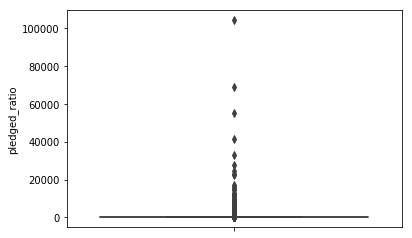

In [30]:
sns.boxplot(y=cleaned_df["pledged_ratio"])

In [31]:
cleaned_df["usd_goal_real"].value_counts()

5000.00      23600
10000.00     20614
1000.00      12959
3000.00      12356
2000.00      11627
15000.00     11299
20000.00     10042
2500.00       9607
500.00        8537
25000.00      8311
1500.00       7968
50000.00      7178
4000.00       6515
30000.00      5863
6000.00       5825
3500.00       5573
8000.00       5096
12000.00      4051
7000.00       4014
7500.00       3974
100000.00     3445
35000.00      2682
40000.00      2460
1200.00       2425
5500.00       2314
4500.00       2272
300.00        2201
600.00        2050
800.00        1908
6500.00       1836
             ...  
9499.45          1
61731.25         1
2104.54          1
93724.23         1
6563.32          1
4246.80          1
426.73           1
18010.75         1
3256.00          1
7028.89          1
40151.96         1
26242.78         1
6174.75          1
464.54           1
8335.04          1
259.53           1
5016.37          1
56146.13         1
8.40             1
31722.87         1
995.50           1
8417.91     

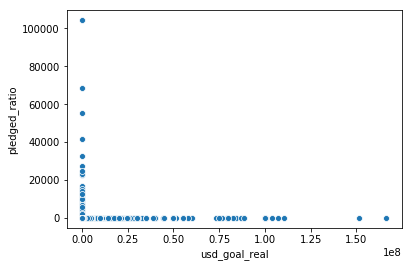

In [32]:
# seems there are some outliers in pledged_ratio and usd goal
sns.scatterplot(cleaned_df["usd_goal_real"], cleaned_df["pledged_ratio"])

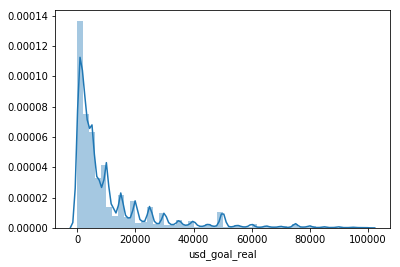

In [33]:
sns.distplot(cleaned_df[cleaned_df["usd_goal_real"] <100000]["usd_goal_real"])

### One-Hot encoding
We will use One-Hot encoding to preprocess category and country for later usage in ML.

In [34]:
category_dummy = pd.get_dummies(cleaned_df['category'])
country_dummy = pd.get_dummies(cleaned_df['country'])

In [35]:
final_df = pd.concat([cleaned_df[['is_successful','backers','duration','usd_pledged_real','usd_goal_real','pledged_ratio']], category_dummy, country_dummy ], axis = 1)
final_df.shape

(372300, 188)

In [37]:
final_df = final_df[final_df['usd_pledged_real']!=0]  # take out campaign with 0 dollars pledged
final_df = final_df[final_df['duration']<100]  # take out campaign that run more than a quarter
final_df = final_df[final_df['backers']!=0]  #  take out campaign with no backer
final_df.shape

(320802, 188)

In [38]:
final_df.head(3)

,is_successful,backers,duration,usd_pledged_real,usd_goal_real,pledged_ratio,3D Printing,Academic,Accessories,Action,...,JP,LU,MX,"N,0""",NL,NO,NZ,SE,SG,US
1,0,15,60.0,2421.0,30000.0,0.080700,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,3,45.0,220.0,45000.0,0.004889,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,30.0,1.0,5000.0,0.000200,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Below developing any models, lets take a look of the data distribution first.

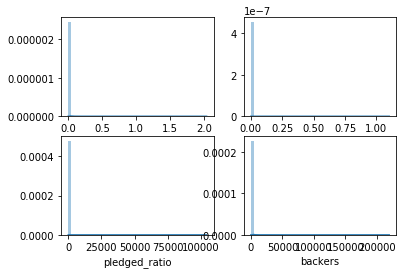

In [73]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
x1 = final_df['usd_pledged_real']
sns.distplot(x1)
ax1.set_xlabel('usd_pledged_real')

ax2 = fig.add_subplot(222)
x2 = final_df['usd_goal_real']
sns.distplot(x2)
ax2.set_xlabel('usd_goal_real')


ax3 = fig.add_subplot(223)
x3 = final_df['pledged_ratio']
sns.distplot(x3)
ax3.set_xlabel('pledged_ratio')


ax4 = fig.add_subplot(224)
x4 = final_df['backers']
sns.distplot(x4)
ax4.set_xlabel('backers')


plt.show()

### Boxcox Transformation
Since the distribution of pledged amount, goal, ratio, backers are very right-skewed, we use Boxcox Transformation for power transformation.

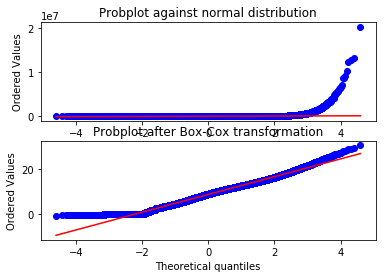

In [74]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = final_df['usd_pledged_real']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt1, _ = stats.boxcox(x)
prob = stats.probplot(xt1, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

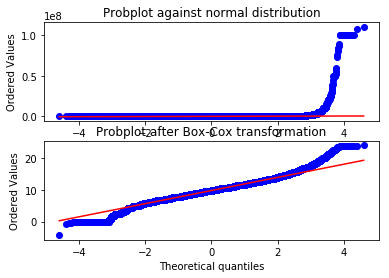

In [75]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = final_df['usd_goal_real']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt2, _ = stats.boxcox(x)
prob = stats.probplot(xt2, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

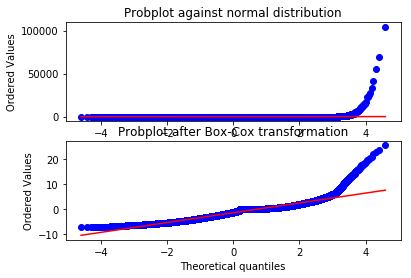

In [76]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = final_df['pledged_ratio']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt3, _ = stats.boxcox(x)
prob = stats.probplot(xt3, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

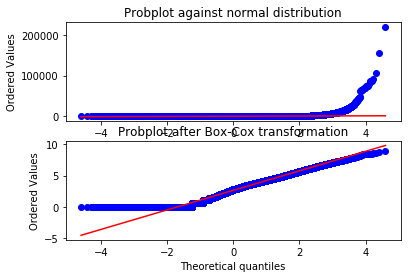

In [77]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = final_df['backers']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt4, _ = stats.boxcox(x)
prob = stats.probplot(xt4, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [78]:
# we saved the transformation data in the dataframe
final_df["log_pledged"] = xt1
final_df["log_goal"] = xt2
final_df["log_ratio"] = xt3
final_df["log_backers"] = xt4

In [79]:
final_df.head()

,is_successful,backers,duration,usd_pledged_real,usd_goal_real,pledged_ratio,3D Printing,Academic,Accessories,Action,...,NL,NO,NZ,SE,SG,US,log_pledged,log_goal,log_ratio,log_backers
1,0,15,60.0,2421.0,30000.0,0.080700,0,0,0,0,...,0,0,0,0,0,1,10.144943,11.858324,-2.163603,2.520601
2,0,3,45.0,220.0,45000.0,0.004889,0,0,0,0,...,0,0,0,0,0,1,6.459910,12.394368,-3.900857,1.066877
3,0,1,30.0,1.0,5000.0,0.000200,0,0,0,0,...,0,0,0,0,0,1,0.000000,9.557446,-5.270578,0.000000
4,0,14,56.0,1283.0,19500.0,0.065795,0,0,0,0,...,0,0,0,0,0,1,9.112718,11.295098,-2.311406,2.460823
5,1,224,35.0,52375.0,50000.0,1.047500,0,0,0,0,...,0,0,0,0,0,1,15.791658,12.534607,0.046540,4.697164


Let's plot the data again to see the distribution. It seems they are much normal now.

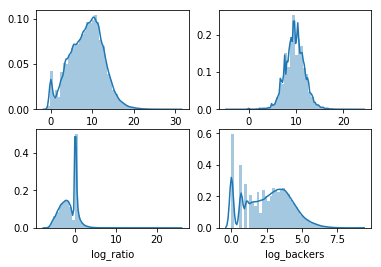

In [80]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
x1 = final_df['log_pledged']
sns.distplot(x1)
ax1.set_xlabel('log_pledged')


ax2 = fig.add_subplot(222)
x2 = final_df['log_goal']
sns.distplot(x2)
ax2.set_xlabel('log_goal')


ax3 = fig.add_subplot(223)
x3 = final_df['log_ratio']
sns.distplot(x3)
ax3.set_xlabel('log_ratio')


ax4 = fig.add_subplot(224)
x4 = final_df['log_backers']
sns.distplot(x4)
ax4.set_xlabel('log_backers')

plt.show()

## Creators' concern about the fund amount being raised
It will be a **regression** problem to predict the amount being raised.

In [71]:
reg_df = final_df.copy()

<a id='regression_m1'></a>
### Linear Regression 1
We only take `duration`, `category`, `country` and `log_goal` as our predicting features to predict `log_pledged`.

In [48]:
#take in all the values that are only available after the campaign ended
#X = duration, category, country, log_goal
X = reg_df.drop(["is_successful","backers","usd_pledged_real","usd_goal_real","pledged_ratio","log_pledged","log_ratio","log_backers"], axis = 1)
y = reg_df["log_pledged"]

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [51]:
# fit train data into model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
# print the intercept and coefficient
print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

19511158340.709614


,Coefficient
duration,-2.295751e-02
3D Printing,7.858511e+09
Academic,7.858511e+09
Accessories,7.858511e+09
Action,7.858511e+09
Animals,7.858511e+09
Animation,7.858511e+09
Anthologies,7.858511e+09
Apparel,7.858511e+09
Apps,7.858511e+09


In [53]:
predictions = lm.predict(X_test)

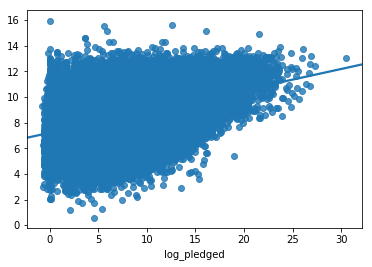

In [54]:
sns.regplot(y_test,predictions)

In [55]:
# print the r2 scores
r2_score(y_test, predictions)

0.16901750854856823

In [56]:
# evaluation
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.937798260189936
MSE: 13.285268761568526
RMSE: 3.64489626211344


From the r2_score, we see that the model cannot find a good fit of the existing data, so as an experiment, we will put some more predicting features to the model to see if it can have better fit.

<a id='regression_m2'></a>
### Linear Regression 2
Besides `duration`, `category`, `country` and `log_goal`, we also include `is_successful` and `log_backers`(which is the number of campaign backers) for prediction. We note that the last 2 features are information we can only get **AFTER** the campaign finished, but we will elaborate later for our model usage if it works.

199640737.87318164
0.8887513590502875
MAE: 0.9848513184750252
MSE: 1.778579103146545
RMSE: 1.3336337964923297


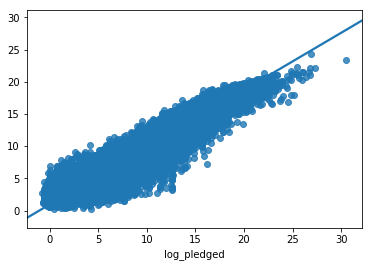

In [57]:
#X = duration, category, country, log_goal, is_successful, log_backers
X = reg_df.drop(["backers","usd_pledged_real","usd_goal_real","pledged_ratio","log_pledged","log_ratio"], axis = 1)
y = reg_df["log_pledged"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

# Linear Regression of log_pledged
lm = LinearRegression()
lm.fit(X_train,y_train)

# print the intercept
print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

predictions = lm.predict(X_test)

sns.regplot(y_test,predictions)

#evaluation
print(r2_score(y_test, predictions))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [58]:
#run using features without log

#X = duration, category, country, goal, is_successful, backers
X = reg_df.drop(["usd_pledged_real","pledged_ratio","log_pledged","log_ratio","log_goal","log_backers"], axis = 1)
y = reg_df["usd_pledged_real"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

# Linear Regression 
lm = LinearRegression()
lm.fit(X_train,y_train)

# print the intercept and coefficient
print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

# Make Prediction
predictions = lm.predict(X_test)

-1732.422867698102
                   Coefficient
is_successful     4.583863e+03
backers           6.998953e+01
duration          8.485199e+01
usd_goal_real     2.582609e-04
3D Printing       4.388277e+04
Academic         -2.035044e+03
Accessories      -9.047966e+02
Action           -1.924523e+03
Animals          -1.924812e+03
Animation        -1.112498e+03
Anthologies      -9.919725e+03
Apparel           6.163118e+02
Apps             -1.099263e+03
Architecture      1.463483e+03
Art              -2.422793e+03
Art Books        -2.895840e+03
Audio            -2.321777e+03
Bacon            -2.112913e+03
Blues            -1.827387e+03
Calendars        -5.322868e+03
Camera Equipment  4.389184e+04
Candles          -1.572712e+03
Ceramics         -1.106710e+03
Children's Books -3.361857e+03
Childrenswear    -8.072339e+02
Chiptune         -9.441998e+03
Civic Design     -1.082262e+01
Classical Music  -3.103491e+03
Comedy           -1.953536e+03
Comic Books      -6.181319e+03
...                 

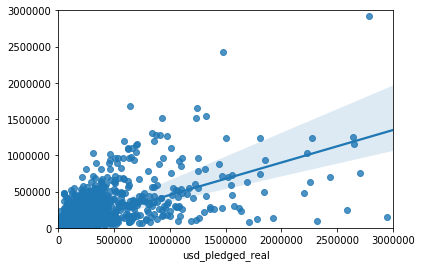

In [59]:
#Plot y_text vs y_pred
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

sns.regplot(y_test,predictions)

In [60]:
#Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8102.3524737526195
MSE: 4744185078.371612
RMSE: 68878.04496624168


In [61]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [62]:
rfr = RandomForestRegressor(random_state=1234)
#X = duration, category, country, log_goal, is_successful, log_backers
X = reg_df.drop(["backers","usd_pledged_real","usd_goal_real","pledged_ratio","log_pledged","log_ratio"], axis = 1)
y = reg_df["log_pledged"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)


rfr.fit(X_train, y_train)

preds_val = rfr.predict(X_test)


In [63]:
# evaluation
print(r2_score(y_test, preds_val))


print('MAE:', metrics.mean_absolute_error(y_test, preds_val))
print('MSE:', metrics.mean_squared_error(y_test, preds_val))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds_val)))

0.8959948237231902
MAE: 0.8626770032648172
MSE: 1.6627747679958036
RMSE: 1.2894862418792237


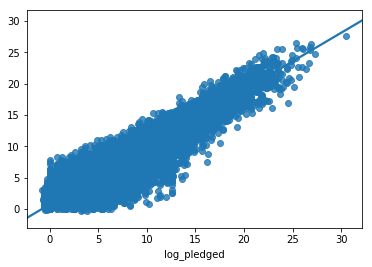

In [64]:
sns.regplot(y_test,preds_val)

<a id='summary_reg'></a>
### Summary for Regression models
* Model 1: using `duration`, `category`, `country` and `log_goal` will not be able to give accurate prediction based on the evaluation metrics.
* Model 2: by including `in_successful` and `log_backers`, the predicting power increased a lot and it implies that both features are important in determining the final pledged amount. Since we do not know either the campaign is successful or not; or the number of backers we have before the campaign starts, the model may be helpful to give founders an estimated goal prediction by making assumptions on the number of backers, if we are having a successful campaign. `RandomForestRegressor` with highest r2 score is recommended for the regression task.


<a id='classification'></a>
## Backers' concern about whether a campaign be successful  
It will be a **classification** problem to predict the campaign is successful or not.  
We will use `log_goal`, `category`, `country`, `duration` as predicting features.

In [81]:
c_df = final_df.copy()

### Logistic Regression

In [83]:
#Train Test Split
#X = log_goal, category, country, duration
X = c_df.drop(["is_successful","backers","usd_pledged_real","usd_goal_real","pledged_ratio","log_pledged","log_ratio","log_backers"], axis = 1)
y = c_df["is_successful"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

# Logistic Regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

# Make Prediction
predictions = lr.predict(X_test)

In [85]:
#evaluation
print(confusion_matrix(y_test, predictions))

[[43721 12093]
 [19867 20560]]


In [86]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.69      0.78      0.73     55814
          1       0.63      0.51      0.56     40427

avg / total       0.66      0.67      0.66     96241



In [87]:
metrics.accuracy_score(y_test, predictions)

0.6679170000311717

In [88]:
lr.score(X_test,y_test)

0.6679170000311717

In [90]:
y_pred_prob = lr.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.13892302, 0.45644887, 0.47152493, ..., 0.50992629, 0.60806886,
       0.4592711 ])

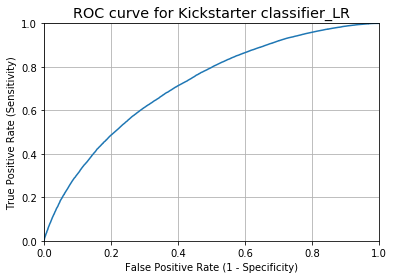

In [91]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Kickstarter classifier_LR')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Random Forest Classifier

In [92]:
#Train Test Split of success
#X = log_goal, category, country, duration
X = c_df.drop(["is_successful","backers","usd_pledged_real","usd_goal_real","pledged_ratio","log_pledged","log_ratio","log_backers"], axis = 1)
y = c_df["is_successful"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
predictions = clf.predict(X_test)

In [94]:
clf.score(X_test, y_test)

0.643416007730593

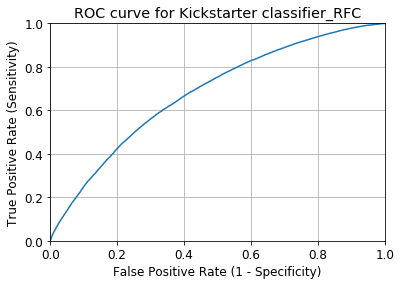

In [95]:
y_pred_prob = clf.predict_proba(X_test)[:,1]
y_pred_prob

# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Kickstarter classifier_RFC')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [96]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

log_goal             0.484882
duration             0.213835
Theater              0.007449
Apps                 0.007195
Indie Rock           0.006908
Tabletop Games       0.006721
US                   0.006275
Video Games          0.006218
Shorts               0.006125
Country & Folk       0.005079
GB                   0.004857
Music                0.004847
Web                  0.004293
Product Design       0.004273
Documentary          0.004080
Apparel              0.003839
CA                   0.003766
Fiction              0.003533
Classical Music      0.003370
Rock                 0.003325
Film & Video         0.003097
Art                  0.003074
Dance                0.003032
Technology           0.003014
Design               0.002984
Publishing           0.002909
Food                 0.002873
Children's Books     0.002832
AU                   0.002729
Crafts               0.002670
                       ...   
Couture              0.000485
Puzzles              0.000484
Stationery

Try to use goal instead of log_goal for Random Forest Classifier

In [225]:
#Train Test Split of success
#X = goal, category, country, duration
X = c_df.drop(["is_successful","backers","usd_pledged_real","pledged_ratio","log_pledged","log_ratio","log_backers","log_goal"], axis = 1)
y = c_df["is_successful"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [226]:
predictions = clf.predict(X_test)

In [227]:
clf.score(X_test, y_test)

0.6435718664602404

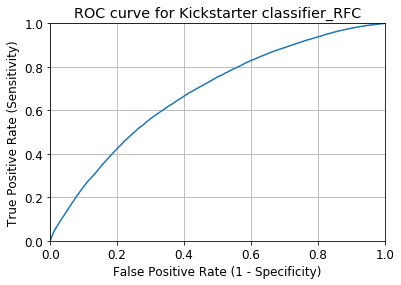

In [228]:
y_pred_prob = clf.predict_proba(X_test)[:,1]
y_pred_prob

# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Kickstarter classifier_RFC')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [229]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

usd_goal_real        0.484998
duration             0.210042
Theater              0.007571
Apps                 0.006975
Tabletop Games       0.006797
Indie Rock           0.006782
Video Games          0.006327
Shorts               0.006100
US                   0.006072
Country & Folk       0.005389
Music                0.005269
GB                   0.004593
Product Design       0.004314
Web                  0.004254
Documentary          0.004193
Apparel              0.003824
CA                   0.003612
Rock                 0.003584
Fiction              0.003583
Classical Music      0.003456
Art                  0.003254
Technology           0.003212
Film & Video         0.003149
Dance                0.003139
Food                 0.003016
Design               0.002988
Publishing           0.002965
Crafts               0.002846
Children's Books     0.002807
Nonfiction           0.002759
                       ...   
Couture              0.000496
Puzzles              0.000489
Fabricatio

<a id='summary_c'></a>
### Summary of Classification problem
* All models are having similar predictive power based on accuracy.
* From feature importances, we found that the campaign goal amount and the campaign duration is crucial in determining the success of a cmapaign.

<a id='improvement'></a>
## Improvement
If we have more time to do the project, we hope to explore more and make the below improvement:

### Long running time of the notebook
* Ways to handle big data set
* Run 2 cells/ notebooks at the same time?

### Feature engineering
* Feature scaling and transformation - try to understand when and why to use them
* Feature Reduction - hand pick features for ML or explore PCA to handle dataframe after one-hot encoding.
* Datetime, timeseries - how to preserve seasonality/ year trend for prediction

### Modeling
* GridsearchCV: hyperparameters tuning, CV 
* Explore Boosting models